In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('final_players.csv')
player_2023=pd.read_csv('Full_Players_2023.csv')
player_2022=pd.read_csv('Full_Players_2022.csv')
player_2021=pd.read_csv('Full_Players_2021.csv')
newbie=pd.read_csv('newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Damián Suárez,uy URU,DF,Getafe,es La Liga,35,1988,94,85,7091,78.7,0.03,0.08,0.03,0.08,0.02,0.09,0.02,0.09,115.0,50.0,43.0,65.0,57.0,57.35,1.91,13.81,28.42,15.92,0.46,57.35,1.46,0.63,0.83,23.04,91.95,49.16,1.04,1.15,0.17,1.18,0.44,26.11,2.81,2.100000,1.460000,2509.0,3780.0,66.0,46198.0,23481.0,1173.0,1424.0,82.0,967.0,1385.0,70.0,316.0,746.0,42.0,0.05,0.07,0.08,-0.02,1.15,3.63,1.09,0.70,4.20,0.380000,0.090000,1.95,8.64,1.49,0.2,0.2,3,0,3,0,0,0
1,1,Fernando,br BRA,MF,Sevilla,es La Liga,36,1987,77,68,5973,66.4,0.06,0.15,0.06,0.15,0.04,0.10,0.04,0.10,35.0,21.0,60.0,13.0,37.0,64.41,5.00,22.61,35.23,7.05,0.41,64.41,0.53,0.32,0.19,35.75,150.86,71.25,0.57,0.93,0.02,0.92,0.42,42.65,0.69,1.250000,0.530000,3306.0,3717.0,89.0,61556.0,16766.0,1302.0,1426.0,91.0,1568.0,1665.0,94.0,364.0,484.0,75.0,0.09,0.06,0.05,0.03,0.51,3.43,0.24,0.02,3.99,0.270000,0.080000,4.93,21.81,3.12,1.3,1.3,3,0,3,0,0,0
2,2,Rodrigo,es ESP,"MF,FW",Leeds United,eng Premier League,32,1991,88,64,5488,61.0,0.43,0.49,0.39,0.46,0.29,0.42,0.26,0.40,96.0,50.0,52.0,44.0,46.0,44.30,1.20,6.08,20.57,17.98,4.18,44.26,1.58,0.82,0.72,26.08,129.05,54.85,1.92,1.23,0.72,2.79,1.18,32.67,6.97,3.160000,1.580000,1508.0,2050.0,74.0,22725.0,5519.0,822.0,1006.0,82.0,434.0,581.0,75.0,137.0,216.0,63.0,0.07,0.13,0.11,-0.07,1.39,1.95,1.13,0.23,3.76,2.590000,0.990000,3.20,8.37,1.97,8.6,8.1,3,3,0,0,0,0
3,3,Victor Osimhen,ng NGA,FW,Napoli,it Serie A,24,1998,83,69,6122,68.0,0.74,0.87,0.71,0.84,0.63,0.73,0.59,0.69,156.0,67.0,43.0,75.0,48.0,27.32,0.94,1.46,8.98,17.43,7.06,27.28,2.29,0.99,1.10,16.13,101.62,40.76,1.96,1.31,1.15,3.19,1.44,21.03,6.97,2.860000,2.290000,679.0,987.0,69.0,9460.0,1272.0,400.0,503.0,80.0,175.0,271.0,65.0,48.0,75.0,64.0,0.13,0.10,0.06,0.03,1.12,0.50,0.24,0.04,0.81,4.250000,1.540000,3.99,11.08,3.19,7.6,8.0,3,0,0,3,0,0
4,4,Allan Saint-Maximin,fr FRA,"FW,MF",Newcastle Utd,eng Premier League,26,1997,85,62,5484,60.9,0.15,0.38,0.15,0.38,0.16,0.36,0.16,0.36,485.0,303.0,62.0,173.0,36.0,39.84,0.24,3.63,16.42,21.28,3.97,39.84,7.96,4.98,2.84,29.43,288.56,156.13,5.81,3.87,2.10,3.38,2.82,30.98,5.98,4.330000,7.960000,1200.0,1638.0,73.0,18543.0,4766.0,657.0,788.0,83.0,393.0,531.0,74.0,95.0,153.0,62.0,0.23,0.21,0.14,0.02,1.82,1.67,1.28,0.26,3.63,2.000000,0.800000,1.48,3.72,1.58,-0.4,-0.4,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)


In [5]:
# Step 1: Extract names from 'newbie' DataFrame
newbie_players_list = newbie['Player'].tolist()

# Step 2: Filter 'forward_players' based on the names from 'newbie'
filtered_forward_players = forward_players[forward_players['Player'].isin(newbie_players_list)]

# Optional: Reset the index of the filtered DataFrame
filtered_forward_players = filtered_forward_players.reset_index(drop=True)


In [6]:
final_player.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts', 'Min', '90s', 'Goals_per90', 'G+A_per90', 'G-PK_per90',
       'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ',
       'Take_Ons_Succ%', 'Tackled_Take_Ons', 'Tackled_Take_Ons%',
       'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90',
       'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
       'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90',
       'Tackled_Take_Ons_per_90', 'Carries_per_90', 'Total_Distance_per_90',
       'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90',
       '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90',
       'Miscontrols_per_90', 'Dispossessed_per_90', 'Passes_Received_per_90',
       'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90',
       'Goal_Creating_

In [7]:
Kane_2023=player_2023[player_2023['Player']=='Harry Kane']
Kane_2023

,Unnamed: 0.1,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net
1126,1126,1350,Harry Kane,eng ENG,FW,Tottenham,eng Premier League,29,1993,38,38,3405,37.8,0.79,0.87,0.66,0.74,0.57,0.75,0.44,0.63,108.0,40.0,37.0,53.0,49.1,35.13,0.74,2.8,17.09,15.85,4.42,34.97,2.86,1.06,1.4,22.06,120.26,48.73,1.59,1.32,0.56,1.96,1.53,27.28,5.11,3.46,0.48,642.0,921.0,69.7,12295.0,4345.0,286.0,368.0,77.7,236.0,302.0,78.1,103.0,164.0,62.8,0.08,0.19,0.11,-0.11,1.51,2.65,1.24,0.16,4.76,3.28,1.43,0.2,0.46,0.13,8.5,8.3


In [8]:
Kane=forward_players[forward_players['Player']=='Harry Kane']
Kane

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
4,14,Harry Kane,eng ENG,FW,Tottenham,eng Premier League,30,1993,110,109,9719,107.9,0.65,0.89,0.53,0.77,0.56,0.77,0.45,0.67,308.0,146.0,47.0,147.0,48.0,38.07,1.2,3.44,18.19,16.99,4.6,37.94,2.86,1.35,1.36,23.48,132.11,58.57,2.06,1.45,0.76,2.17,1.6,29.64,5.47,3.57,2.86,1931.0,2831.0,68.0,34225.0,11552.0,903.0,1188.0,76.0,629.0,858.0,73.0,280.0,444.0,63.0,0.24,0.22,0.12,0.02,1.43,2.68,1.18,0.16,4.22,3.57,1.39,6.48,16.74,4.54,9.8,8.0,3,3,0,0,0,0


In [9]:
# Assuming 'forward_players' is the DataFrame containing filtered forward players

# Remove the row containing "Harry Kane" from the DataFrame
forward_players = forward_players[forward_players['Player'] != 'Harry Kane']

# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)


In [10]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90',
       'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ',
       'Take_Ons_Succ%', 'Tackled_Take_Ons', 'Tackled_Take_Ons%',
       'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90',
       'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
       'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90',
       'Tackled_Take_Ons_per_90', 'Carries_per_90', 'Total_Distance_per_90',
       'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90',
       '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90',
       'Miscontrols_per_90', 'Dispossessed_per_90', 'Passes_Received_per_90',
       'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Passes_Total_Cmp', 'Passes_Total_Att',
       'Passes_Total_Cmp%', 'Passes_TotDist', 'Passes_PrgDist',
       'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%',
       'Passes_Medium_Cmp', 'Passes_Medium_Att', 'Passes_Medium_Cmp%',
       'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%',
       'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90',
       'Key_Passes_per_90', 'Passes_1/3_per_90', 'Passes_Penalty_Area_per_90',
       'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90',
       'Shots_total_per90', 'Shots_on_target_per90', 'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[91]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
91         50.0       56.0        51.0          57.0      19.0          38.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
91        16.0            34.0                39.0           37.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
91            19.0              45.0               87.0            85.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
91                    44.0                    96.0                    79.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
91                    78.0                     5.0                       84.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
91                       35.0                  26.0                     46.0   

    Carries_per_90  Total_Distance_per_90  \
91            78.0     

In [11]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[91]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
91        51.0          57.0        16.0            34.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
91                        65.0                     51.0            60.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
91        82.0       94.0               83.0                        84.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
91            54.0                      53.0           45.0      92.0  


In [12]:
kane_percentile_ranks_list = kane_percentile_ranks.values.flatten().tolist()

kane_percentile_ranks_list

[51.0,
 57.0,
 16.0,
 34.0,
 65.0,
 51.0,
 60.0,
 82.0,
 94.0,
 83.0,
 84.0,
 54.0,
 53.0,
 45.0,
 92.0]

In [13]:
image_path = "Kane.jpg"
fdj_cropped = Image.open(image_path)


In [14]:
split_params = [param.replace('_', '\n') for param in params]


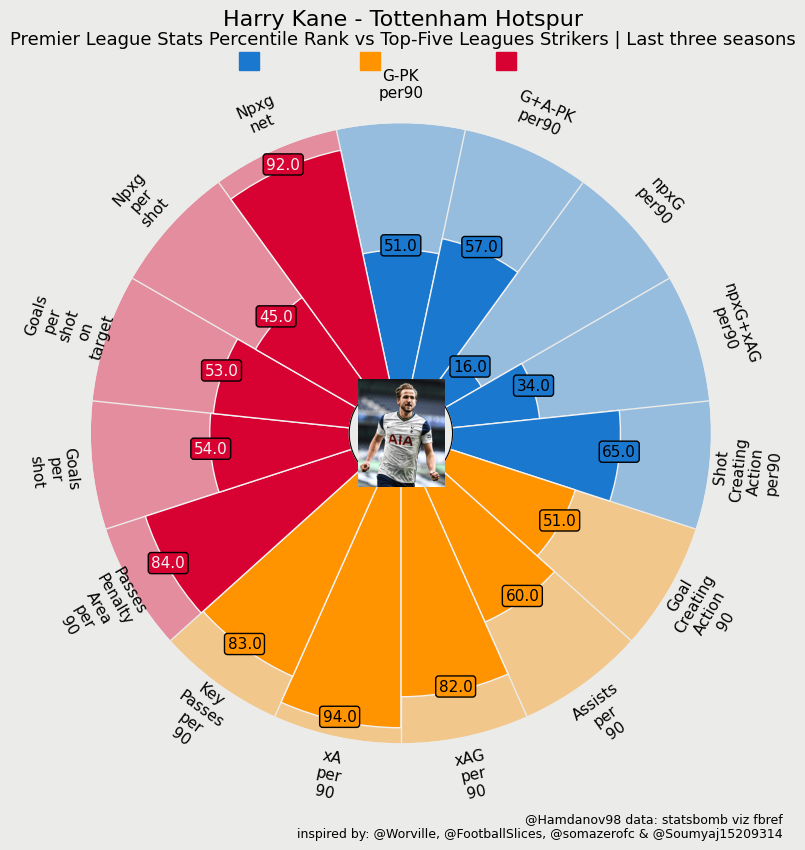

In [15]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90',
       'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
       'Carries_per_90', 'Total_Distance_per_90',
       'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90',
       '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90',
       'Miscontrols_per_90', 'Dispossessed_per_90', 'Passes_Received_per_90',
       'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Passes_Total_Cmp', 'Passes_Total_Att',
       'Passes_Total_Cmp%', 'Passes_TotDist', 'Passes_PrgDist',
       'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%',
       'Passes_Medium_Cmp', 'Passes_Medium_Att', 'Passes_Medium_Cmp%',
       'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%',
       'Assists_per_90', 'xAG_per_90', 'xA_per_90',
       'Key_Passes_per_90', 'Passes_1/3_per_90', 'Passes_Penalty_Area_per_90',
       'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90',
       'Shots_total_per90', 'Shots_on_target_per90', 'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 'Npxg_net']

# Step 1: Standardize the data
scaler = StandardScaler()
forward_players_scaled = scaler.fit_transform(forward_players[relevant_columns])
Kane_scaled = scaler.transform(Kane[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Kane[relevant_columns], forward_players[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(Kane_scaled, forward_players_scaled.T)
magnitude_Kane = np.linalg.norm(Kane_scaled, axis=1, keepdims=True)
magnitude_forward_players = np.linalg.norm(forward_players_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_Kane * magnitude_forward_players.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': forward_players['Player'], 'Similarity': cosine_similarity_signed[0],'League':forward_players['Comp'],'Squad':forward_players['Squad'],'Age':forward_players['Age'],'Seasons at top 5': forward_players['Seasons at top 5'],'Seasons in PL': forward_players['Seasons in PL'] ,'Seasons in Liga':forward_players['Seasons in Liga'],'Seasons in Serie A':forward_players['Seasons in Serie A'],'Seasons in Ligue 1': forward_players['Seasons in Ligue 1'],'Seasons in Bundesliga':forward_players['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Kane
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Kane
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Kane based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [17]:
similarity_df


,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Iago Aspas,0.857911,es La Liga,Celta Vigo,35,3,0,3,0,0,0
1,Domenico Berardi,0.829505,it Serie A,Sassuolo,28,3,0,0,3,0,0
2,Son Heung-min,0.821125,eng Premier League,Tottenham,31,3,3,0,0,0,0
3,Gerard Moreno,0.812053,es La Liga,Villarreal,31,3,0,3,0,0,0
4,Karim Benzema,0.721960,es La Liga,Real Madrid,35,3,0,3,0,0,0
5,Paulo Dybala,0.704933,it Serie A,Juventus+Roma,29,3,0,0,3,0,0
6,Florian Sotoca,0.686315,fr Ligue 1,Lens,32,3,0,0,0,3,0
7,Wissam Ben Yedder,0.662434,fr Ligue 1,Monaco,32,3,0,0,0,3,0
8,Rafael Leão,0.653021,it Serie A,Milan,24,3,0,0,3,0,0
9,Ciro Immobile,0.651647,it Serie A,Lazio,33,3,0,0,3,0,0


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

relevant_columns=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 
       'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90',
       'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90',
       'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Carries_per_90', 'Total_Distance_per_90',
       'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90',
       '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90',
       'Miscontrols_per_90', 'Dispossessed_per_90', 'Passes_Received_per_90',
       'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Passes_Total_Cmp', 'Passes_Total_Att',
       'Passes_Total_Cmp%', 'Passes_TotDist', 'Passes_PrgDist',
       'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%',
       'Passes_Medium_Cmp', 'Passes_Medium_Att', 'Passes_Medium_Cmp%',
       'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%',
       'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_1/3_per_90', 'Passes_Penalty_Area_per_90',
       'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90',
       'Shots_total_per90', 'Shots_on_target_per90', 'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 'Npxg_net']

# Step 1: Standardize the data
scaler = StandardScaler()
newbie_scaled = scaler.fit_transform(newbie[relevant_columns])
Kane_scaled = scaler.transform(Kane_2023[relevant_columns])

# Step 2: Concatenate dataframes
combined_data = pd.concat([Kane[relevant_columns], newbie[relevant_columns]], axis=0)

# Step 3: Calculate cosine similarity with signed magnitudes
cosine_sim_signed = np.dot(Kane_scaled, newbie_scaled.T)
magnitude_Kane = np.linalg.norm(Kane_scaled, axis=1, keepdims=True)
magnitude_newbie = np.linalg.norm(newbie_scaled, axis=1, keepdims=True)
cosine_similarity_signed = cosine_sim_signed / (magnitude_Kane * magnitude_newbie.T)

# Step 4: Create a new dataframe to store the similarity scores and goalkeeper names
similarity_df = pd.DataFrame({'Player': newbie['Player'], 'Similarity': cosine_similarity_signed[0],'League':newbie['Comp'],'Squad':newbie['Squad'],'Age':newbie['Age'],'Seasons at top 5': newbie['Seasons at top 5'],'Seasons in PL': newbie['Seasons in PL'] ,'Seasons in Liga':newbie['Seasons in Liga'],'Seasons in Serie A':newbie['Seasons in Serie A'],'Seasons in Ligue 1': newbie['Seasons in Ligue 1'],'Seasons in Bundesliga':newbie['Seasons in Bundesliga']})

# Sort the goalkeepers based on similarity scores in descending order
similarity_df = similarity_df.sort_values(by='Similarity', ascending=False, ignore_index=True)

# Goalkeepers most similar to Kane
most_similar_goalkeepers = similarity_df.head(5)

# Goalkeepers least similar to Kane
least_similar_goalkeepers = similarity_df.tail(5)

# Now you have the most similar and least similar goalkeepers to Kane based on cosine similarity with signed magnitudes.
# You can further analyze their specific goalkeeping and passing attributes to understand the similarities and differences.


In [19]:
similarity_df


,Player,Similarity,League,Squad,Age,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,Niclas Füllkrug,0.821230,de Bundesliga,Werder Bremen,29,1,0,0,0,0,1
1,Marvin Ducksch,0.745422,de Bundesliga,Werder Bremen,28,1,0,0,0,0,1
2,Junya Ito,0.663736,fr Ligue 1,Reims,29,1,0,0,0,1,0
3,Khvicha Kvaratskhelia,0.621175,it Serie A,Napoli,21,1,0,0,1,0,0
4,Kevin Behrens,0.505919,de Bundesliga,Union Berlin,31,1,0,0,0,0,1
5,Eric Maxim Choupo-Moting,0.372944,de Bundesliga,Bayern Munich,33,1,0,0,0,0,1
6,Antony,0.332694,eng Premier League,Manchester Utd,22,1,1,0,0,0,0
7,Nicolas Jackson,0.305209,es La Liga,Villarreal,21,1,0,1,0,0,0
8,Loïs Openda,0.280366,fr Ligue 1,Lens,22,1,0,0,0,1,0
9,Philipp Hofmann,0.272701,de Bundesliga,Bochum,29,1,0,0,0,0,1
